# AWS Glue Studio Notebook
##### You are now running a AWS Glue Studio notebook; To start using your notebook you need to start an AWS Glue Interactive Session.


#### Optional: Run this cell to see available notebook commands ("magics").


In [ ]:
%help

####  Run this cell to set up and start your interactive session.


In [1]:
%idle_timeout 2880
%glue_version 5.0
%worker_type G.1X
%number_of_workers 5

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
  
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)

Welcome to the Glue Interactive Sessions Kernel
For more information on available magic commands, please type %help in any new cell.

Please view our Getting Started page to access the most up-to-date information on the Interactive Sessions kernel: https://docs.aws.amazon.com/glue/latest/dg/interactive-sessions.html
Installed kernel version: 1.0.7 
Current idle_timeout is None minutes.
idle_timeout has been set to 2880 minutes.
Setting Glue version to: 5.0
Previous worker type: None
Setting new worker type to: G.1X
Previous number of workers: None
Setting new number of workers to: 5
Trying to create a Glue session for the kernel.
Session Type: glueetl
Worker Type: G.1X
Number of Workers: 5
Idle Timeout: 2880
Session ID: b2f52d62-b276-4acb-9a58-f4edc9167d7c
Applying the following default arguments:
--glue_kernel_version 1.0.7
--enable-glue-datacatalog true
Waiting for session b2f52d62-b276-4acb-9a58-f4edc9167d7c to get into ready status...
Session b2f52d62-b276-4acb-9a58-f4edc9167d7c ha

#### Example: Create a DynamicFrame from a table in the AWS Glue Data Catalog and display its schema


In [ ]:
# dyf = glueContext.create_dynamic_frame.from_catalog(database='database_name', table_name='table_name')
# dyf.printSchema()

#### Example: Convert the DynamicFrame to a Spark DataFrame and display a sample of the data


In [ ]:
# df = dyf.toDF()
# df.show()

#### Example: Visualize data with matplotlib


Welcome to the Glue Interactive Sessions Kernel
For more information on available magic commands, please type %help in any new cell.

Please view our Getting Started page to access the most up-to-date information on the Interactive Sessions kernel: https://docs.aws.amazon.com/glue/latest/dg/interactive-sessions.html
Installed kernel version: 1.0.7 
Trying to create a Glue session for the kernel.
Session Type: glueetl
Session ID: 7c2607aa-d018-49be-a2a0-acab848ad6fb
Applying the following default arguments:
--glue_kernel_version 1.0.7
--enable-glue-datacatalog true
Waiting for session 7c2607aa-d018-49be-a2a0-acab848ad6fb to get into ready status...
Session 7c2607aa-d018-49be-a2a0-acab848ad6fb has been created.
<BarContainer object of 5 artists>



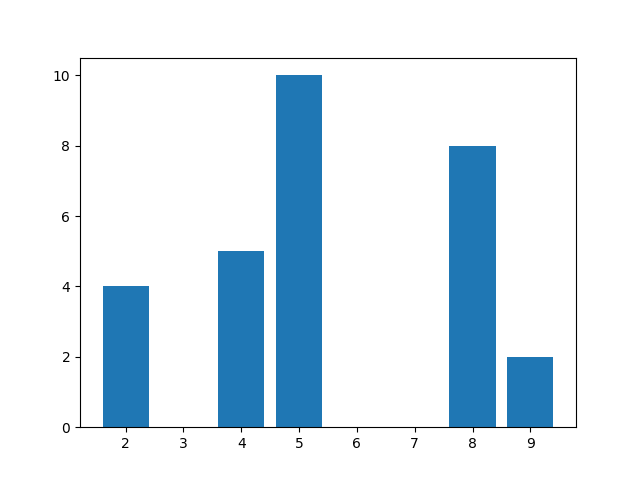

In [1]:
# import matplotlib.pyplot as plt

# # Set X-axis and Y-axis values
# x = [5, 2, 8, 4, 9]
# y = [10, 4, 8, 5, 2]
  
# # Create a bar chart 
# plt.bar(x, y)
  
# # Show the plot
# %matplot plt

#### Example: Write the data in the DynamicFrame to a location in Amazon S3 and a table for it in the AWS Glue Data Catalog


In [ ]:
# s3output = glueContext.getSink(
#   path="s3://bucket_name/folder_name",
#   connection_type="s3",
#   updateBehavior="UPDATE_IN_DATABASE",
#   partitionKeys=[],
#   compression="snappy",
#   enableUpdateCatalog=True,
#   transformation_ctx="s3output",
# )
# s3output.setCatalogInfo(
#   catalogDatabase="demo", catalogTableName="populations"
# )
# s3output.setFormat("glueparquet")
# s3output.writeFrame(DyF)

In [2]:
from pyspark.sql import SparkSession

# Read CSV File
df = spark.read.option("header",True).csv("s3://humanaproject/QUALITY_DATA.csv")
df.printSchema()

root
 |-- measurement_year: string (nullable = true)
 |-- measure_name: string (nullable = true)
 |-- measure_desc: string (nullable = true)
 |-- measure_type: string (nullable = true)
 |-- base_event_date: string (nullable = true)
 |-- compliant_cnt: string (nullable = true)
 |-- eligible_cnt: string (nullable = true)
 |-- id: string (nullable = true)


In [3]:
from pyspark.sql.types import IntegerType, StringType, DoubleType, LongType, BooleanType
from pyspark.sql.functions import col
df = df.withColumn('eligible_cnt', col('eligible_cnt').cast(IntegerType()))
df = df.withColumn('compliant_cnt', col('compliant_cnt').cast(IntegerType()))

In [4]:
df.dropDuplicates( subset=['measurement_year','measure_name', 'measure_type','base_event_date','compliant_cnt',	'eligible_cnt',	'id'])

DataFrame[measurement_year: string, measure_name: string, measure_desc: string, measure_type: string, base_event_date: string, compliant_cnt: int, eligible_cnt: int, id: string]


In [5]:
from pyspark.sql import functions as F

df_agg=df.groupby(['id']).pivot('measure_name').agg({'eligible_cnt':'sum'})


In [6]:
dct=dict()
for i in df_agg.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct[i]= i.replace(' ', '_')+'_elig_cnt'
    
dct

{'ABA': 'ABA_elig_cnt', 'ADH (ACE)': 'ADH_(ACE)_elig_cnt', 'ADH (DIAB)': 'ADH_(DIAB)_elig_cnt', 'ADH (STATIN)': 'ADH_(STATIN)_elig_cnt', 'ART': 'ART_elig_cnt', 'ASV': 'ASV_elig_cnt', 'BCS': 'BCS_elig_cnt', 'CBP': 'CBP_elig_cnt', 'CDC (EYE)': 'CDC_(EYE)_elig_cnt', 'CDC (HbA1c)': 'CDC_(HbA1c)_elig_cnt', 'CDC (NPH)': 'CDC_(NPH)_elig_cnt', 'COA (FSA)': 'COA_(FSA)_elig_cnt', 'COA (MDR)': 'COA_(MDR)_elig_cnt', 'COA (PNS)': 'COA_(PNS)_elig_cnt', 'COL': 'COL_elig_cnt', 'COL (45-50)': 'COL_(45-50)_elig_cnt', 'EED': 'EED_elig_cnt', 'EGR': 'EGR_elig_cnt', 'ESA': 'ESA_elig_cnt', 'ETA': 'ETA_elig_cnt', 'FMC': 'FMC_elig_cnt', 'HBD': 'HBD_elig_cnt', 'KED': 'KED_elig_cnt', 'MDR': 'MDR_elig_cnt', 'MRP': 'MRP_elig_cnt', 'OMW': 'OMW_elig_cnt', 'PCR': 'PCR_elig_cnt', 'RXC': 'RXC_elig_cnt', 'SBT': 'SBT_elig_cnt', 'SFT': 'SFT_elig_cnt', 'SPC STATIN': 'SPC_STATIN_elig_cnt', 'SUPD': 'SUPD_elig_cnt', 'SWT': 'SWT_elig_cnt', 'TBC': 'TBC_elig_cnt', 'TEX': 'TEX_elig_cnt', 'TFP': 'TFP_elig_cnt', 'TRC (MRP)': 'TRC_(

In [7]:
from pyspark.sql import DataFrame

def rename_columns(df: DataFrame, rename_dict: dict) -> DataFrame:
    """
    Rename columns in a PySpark DataFrame based on a dictionary.

    :param df: Input PySpark DataFrame
    :param rename_dict: Dictionary with old column names as keys and new column names as values
    :return: PySpark DataFrame with renamed columns
    """
    for old_col, new_col in rename_dict.items():
        df = df.withColumnRenamed(old_col, new_col)
    return df

# Example usage:
# Assuming df_agg is your DataFrame and dct_comp is your dictionary
df_agg_renamed_mn_elg = rename_columns(df_agg, dct)


In [8]:
from pyspark.sql import functions as F

df_agg_comp=df.groupby(['id']).pivot('measure_name').agg({'compliant_cnt':'sum'}) 

In [9]:
dct_comp=dict()
for i in df_agg.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct_comp[i]= i.replace(' ', '_')+'_comp_cnt'
    
dct_comp

{'ABA': 'ABA_comp_cnt', 'ADH (ACE)': 'ADH_(ACE)_comp_cnt', 'ADH (DIAB)': 'ADH_(DIAB)_comp_cnt', 'ADH (STATIN)': 'ADH_(STATIN)_comp_cnt', 'ART': 'ART_comp_cnt', 'ASV': 'ASV_comp_cnt', 'BCS': 'BCS_comp_cnt', 'CBP': 'CBP_comp_cnt', 'CDC (EYE)': 'CDC_(EYE)_comp_cnt', 'CDC (HbA1c)': 'CDC_(HbA1c)_comp_cnt', 'CDC (NPH)': 'CDC_(NPH)_comp_cnt', 'COA (FSA)': 'COA_(FSA)_comp_cnt', 'COA (MDR)': 'COA_(MDR)_comp_cnt', 'COA (PNS)': 'COA_(PNS)_comp_cnt', 'COL': 'COL_comp_cnt', 'COL (45-50)': 'COL_(45-50)_comp_cnt', 'EED': 'EED_comp_cnt', 'EGR': 'EGR_comp_cnt', 'ESA': 'ESA_comp_cnt', 'ETA': 'ETA_comp_cnt', 'FMC': 'FMC_comp_cnt', 'HBD': 'HBD_comp_cnt', 'KED': 'KED_comp_cnt', 'MDR': 'MDR_comp_cnt', 'MRP': 'MRP_comp_cnt', 'OMW': 'OMW_comp_cnt', 'PCR': 'PCR_comp_cnt', 'RXC': 'RXC_comp_cnt', 'SBT': 'SBT_comp_cnt', 'SFT': 'SFT_comp_cnt', 'SPC STATIN': 'SPC_STATIN_comp_cnt', 'SUPD': 'SUPD_comp_cnt', 'SWT': 'SWT_comp_cnt', 'TBC': 'TBC_comp_cnt', 'TEX': 'TEX_comp_cnt', 'TFP': 'TFP_comp_cnt', 'TRC (MRP)': 'TRC_(

In [10]:
df_agg_renamed_mn_comp = rename_columns(df_agg_comp, dct_comp)

In [11]:
from pyspark.sql import functions as F

df_agg_mt_comp=df.groupby(['id']).pivot('measure_type').agg({'compliant_cnt':'sum'})

In [14]:
dct_comp_mt=dict()
for i in df_agg_mt_comp.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct_comp_mt[i]= i.replace(' ', '_')+'_comp_cnt'
    
dct_comp_mt

{'HEDIS': 'HEDIS_comp_cnt', 'Patient Experience': 'Patient_Experience_comp_cnt', 'Patient Safety': 'Patient_Safety_comp_cnt'}


In [15]:
df_agg_renamed_mt_comp = rename_columns(df_agg_mt_comp, dct_comp_mt)

In [16]:
from pyspark.sql import functions as F

df_agg_mt_elg=df.groupby(['id']).pivot('measure_type').agg({'eligible_cnt':'sum'})

In [17]:
dct_elg_mt=dict()
for i in df_agg_mt_elg.columns:
  if i not in ['id','measurement_year''measure_name']:
    dct_elg_mt[i]= i.replace(' ', '_')+'_elig_cnt'
    
dct_elg_mt

{'HEDIS': 'HEDIS_elig_cnt', 'Patient Experience': 'Patient_Experience_elig_cnt', 'Patient Safety': 'Patient_Safety_elig_cnt'}


In [18]:
df_agg_renamed_mt_elg = rename_columns(df_agg_mt_elg, dct_elg_mt)

In [23]:
final_agg_df = df_agg_renamed_mn_elg.join(df_agg_renamed_mn_comp, on="id", how="outer").join(df_agg_renamed_mt_comp, on="id", how="outer").join(df_agg_renamed_mt_elg, on="id", how="outer").fillna(0)


In [24]:
eligible_columns = [col for col in final_agg_df.columns if col.endswith("_elig_cnt")]
compliant_columns = [col for col in final_agg_df.columns if col.endswith("_comp_cnt")]

In [27]:
eligible_columns.sort()
compliant_columns.sort()

['ABA_comp_cnt', 'ADH_(ACE)_comp_cnt', 'ADH_(DIAB)_comp_cnt', 'ADH_(STATIN)_comp_cnt', 'ART_comp_cnt', 'ASV_comp_cnt', 'BCS_comp_cnt', 'CBP_comp_cnt', 'CDC_(EYE)_comp_cnt', 'CDC_(HbA1c)_comp_cnt', 'CDC_(NPH)_comp_cnt', 'COA_(FSA)_comp_cnt', 'COA_(MDR)_comp_cnt', 'COA_(PNS)_comp_cnt', 'COL_(45-50)_comp_cnt', 'COL_comp_cnt', 'EED_comp_cnt', 'EGR_comp_cnt', 'ESA_comp_cnt', 'ETA_comp_cnt', 'FMC_comp_cnt', 'HBD_comp_cnt', 'HEDIS_comp_cnt', 'KED_comp_cnt', 'MDR_comp_cnt', 'MRP_comp_cnt', 'OMW_comp_cnt', 'PCR_comp_cnt', 'Patient_Experience_comp_cnt', 'Patient_Safety_comp_cnt', 'RXC_comp_cnt', 'SBT_comp_cnt', 'SFT_comp_cnt', 'SPC_STATIN_comp_cnt', 'SUPD_comp_cnt', 'SWT_comp_cnt', 'TBC_comp_cnt', 'TEX_comp_cnt', 'TFP_comp_cnt', 'TRC_(MRP)_comp_cnt', 'TRC_(PED)_comp_cnt']


In [30]:
dict_ratio = {}
for i in range(len(eligible_columns)):
    dict_ratio[eligible_columns[i][0:-9]+"_ratio"] = [eligible_columns[i],compliant_columns[i]]

dict_ratio

{'ABA_ratio': ['ABA_elig_cnt', 'ABA_comp_cnt'], 'ADH_(ACE)_ratio': ['ADH_(ACE)_elig_cnt', 'ADH_(ACE)_comp_cnt'], 'ADH_(DIAB)_ratio': ['ADH_(DIAB)_elig_cnt', 'ADH_(DIAB)_comp_cnt'], 'ADH_(STATIN)_ratio': ['ADH_(STATIN)_elig_cnt', 'ADH_(STATIN)_comp_cnt'], 'ART_ratio': ['ART_elig_cnt', 'ART_comp_cnt'], 'ASV_ratio': ['ASV_elig_cnt', 'ASV_comp_cnt'], 'BCS_ratio': ['BCS_elig_cnt', 'BCS_comp_cnt'], 'CBP_ratio': ['CBP_elig_cnt', 'CBP_comp_cnt'], 'CDC_(EYE)_ratio': ['CDC_(EYE)_elig_cnt', 'CDC_(EYE)_comp_cnt'], 'CDC_(HbA1c)_ratio': ['CDC_(HbA1c)_elig_cnt', 'CDC_(HbA1c)_comp_cnt'], 'CDC_(NPH)_ratio': ['CDC_(NPH)_elig_cnt', 'CDC_(NPH)_comp_cnt'], 'COA_(FSA)_ratio': ['COA_(FSA)_elig_cnt', 'COA_(FSA)_comp_cnt'], 'COA_(MDR)_ratio': ['COA_(MDR)_elig_cnt', 'COA_(MDR)_comp_cnt'], 'COA_(PNS)_ratio': ['COA_(PNS)_elig_cnt', 'COA_(PNS)_comp_cnt'], 'COL_(45-50)_ratio': ['COL_(45-50)_elig_cnt', 'COL_(45-50)_comp_cnt'], 'COL_ratio': ['COL_elig_cnt', 'COL_comp_cnt'], 'EED_ratio': ['EED_elig_cnt', 'EED_comp_cnt

In [32]:
for key, value in dict_ratio.items():
    final_agg_df = final_agg_df.withColumn(key, F.when( F.col(value[0]) !=0, F.col(value[1])/ F.col(value[0])).otherwise(None))
    


In [34]:
# final_agg_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- ABA_elig_cnt: long (nullable = true)
 |-- ADH_(ACE)_elig_cnt: long (nullable = true)
 |-- ADH_(DIAB)_elig_cnt: long (nullable = true)
 |-- ADH_(STATIN)_elig_cnt: long (nullable = true)
 |-- ART_elig_cnt: long (nullable = true)
 |-- ASV_elig_cnt: long (nullable = true)
 |-- BCS_elig_cnt: long (nullable = true)
 |-- CBP_elig_cnt: long (nullable = true)
 |-- CDC_(EYE)_elig_cnt: long (nullable = true)
 |-- CDC_(HbA1c)_elig_cnt: long (nullable = true)
 |-- CDC_(NPH)_elig_cnt: long (nullable = true)
 |-- COA_(FSA)_elig_cnt: long (nullable = true)
 |-- COA_(MDR)_elig_cnt: long (nullable = true)
 |-- COA_(PNS)_elig_cnt: long (nullable = true)
 |-- COL_elig_cnt: long (nullable = true)
 |-- COL_(45-50)_elig_cnt: long (nullable = true)
 |-- EED_elig_cnt: long (nullable = true)
 |-- EGR_elig_cnt: long (nullable = true)
 |-- ESA_elig_cnt: long (nullable = true)
 |-- ETA_elig_cnt: long (nullable = true)
 |-- FMC_elig_cnt: long (nullable = true)
 |-- HBD_el

In [ ]:
from awsglue.dynamicframe import DynamicFrame
# Convert Spark DataFrame to Glue DynamicFrame
dynamic_df = DynamicFrame.fromDF(final_agg_df, glueContext, "dynamic_df")

# Specify the S3 path where the file should be stored
output_path = "s3://humanaproject/staging_temp/quality/"

# Write the DynamicFrame to S3 in CSV format
glueContext.write_dynamic_frame.from_options(
    frame=dynamic_df,
    connection_type="s3",
    connection_options={"path": output_path},
    format="csv"
)

print(f"Data successfully written to {output_path}")